# Import the necessary libraires

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# 2.image pre processing

In [28]:
#1.import image data generator
from keras.preprocessing.image import ImageDataGenerator

In [29]:
#2.Configure the image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
!pip install -q kaggle
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
!cp /content/kaggle.json ~/.kaggle

In [22]:
!kaggle datasets download -d sritulasi/animal-classiffication

 82% 51.0M/62.3M [00:00<00:00, 88.1MB/s]
100% 62.3M/62.3M [00:00<00:00, 94.3MB/s]


In [24]:
!unzip /content/animal-classiffication.zip

Archive:  /content/animal-classiffication.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jp

In [31]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'/content/dataset/Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'/content/dataset/Testing',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [32]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


Mounted at /content/drive


print(x_test.class_indices)

# Model building

In [33]:
#2.initializing the model
model=Sequential()

In [34]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))


In [35]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [36]:
#add flatten layer
model.add(Flatten())

In [37]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))


In [38]:
#output layer
model.add(Dense(units=4,activation="softmax"))

In [39]:
#Complie the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")


In [40]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=len(x_train),epochs=5,validation_data=x_test,validation_steps=10)


Epoch 1/5
39/39 [==============================] - 12s 271ms/step - loss: 1.6794 - accuracy: 0.4128 - val_loss: 0.9697 - val_accuracy: 0.6719
Epoch 2/5
39/39 [==============================] - 9s 225ms/step - loss: 0.9301 - accuracy: 0.6325 - val_loss: 0.7983 - val_accuracy: 0.7125
Epoch 3/5
39/39 [==============================] - 9s 227ms/step - loss: 0.7999 - accuracy: 0.6777 - val_loss: 0.6154 - val_accuracy: 0.7469
Epoch 4/5
39/39 [==============================] - 10s 247ms/step - loss: 0.7395 - accuracy: 0.7116 - val_loss: 0.5105 - val_accuracy: 0.8250
Epoch 5/5
39/39 [==============================] - 10s 256ms/step - loss: 0.6502 - accuracy: 0.7585 - val_loss: 0.4786 - val_accuracy: 0.8125


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3,937,796
Trainable params: 3,937,796
Non-trainable params: 0
______________________________________________

In [42]:
#save the model
model.save("animal1_class.h5")

In [63]:
# Save model in tar file


!tar -zcvf ibm_animal-classification.tgz animal1_class.h5

animal1_class.h5


# testing the model

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [44]:
model=load_model(r"/content/animal1_class.h5",compile=False)

In [45]:
img=image.load_img(r"/content/dataset/Testing/elephants/Z (1).jpeg",target_size=(64,64))

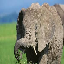

In [46]:
img

In [47]:
x=image.img_to_array(img)

In [48]:
x

array([[[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [106., 152., 202.],
        [104., 150., 200.],
        [103., 149., 199.]],

       [[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [110., 150., 199.],
        [110., 148., 197.],
        [106., 146., 195.]],

       [[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [112., 150., 199.],
        [111., 147., 195.],
        [108., 144., 192.]],

       ...,

       [[108., 148.,  75.],
        [105., 145.,  72.],
        [111., 151.,  78.],
        ...,
        [110., 150.,  79.],
        [110., 151.,  75.],
        [112., 153.,  75.]],

       [[100., 140.,  67.],
        [ 96., 136.,  63.],
        [107., 147.,  74.],
        ...,
        [107., 144.,  74.],
        [113., 151.,  78.],
        [112., 150.,  75.]],

       [[102., 142.,  71.],
        [ 98., 138.,  67.],
        [105., 1

In [49]:
x=np.expand_dims(x,axis=0)

In [50]:
pred = np.argmax(model.predict(x)) # predicting the higher probability index
index = ['bears','crows','elephants','rats']
pred

1/1 [==============================] - 0s 112ms/step


2

In [51]:
index[pred]

'elephants'

# **ibm cloud deployment**

In [52]:
!pip install watson-machine-learning-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.4 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.13.1-py3-none-any.whl size=73908 sha256=1f471e2158a644847cc748f77312474da902e69b0d2bc5b9fb2447401ee9042f
  Stored in directory: /root/.cache/pip/wheels/b6/eb/9b/7367fc7267dc24ec4

In [53]:
!pip install ibm_watson_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.3 MB/s eta 0:00:00


In [68]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"78tQxQZCL4sFJDmiM_Z680iuA6O5ftseHJj_12xpFkw6"
}

In [69]:
client = APIClient(wml_credentials)

In [70]:
client

In [71]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------  ------------------------
ID                                    NAME             CREATED
dc9c4aef-6ee3-42a2-8947-c89791b5e781  ibm_deploy       2023-08-08T07:47:05.753Z
6f7a5102-0254-4e4f-8b22-52615a1f5145  animal_deploy_1  2023-08-08T07:01:59.079Z
eb5364f3-0c04-447c-955b-126cdef67987  MLR_Deploy       2023-05-08T05:36:34.461Z
01e07363-516e-47f7-b4fc-1837c4a03c43  animal_deploy    2023-03-17T13:42:08.646Z
------------------------------------  ---------------  ------------------------


,ID,NAME,CREATED
0,dc9c4aef-6ee3-42a2-8947-c89791b5e781,ibm_deploy,2023-08-08T07:47:05.753Z
1,6f7a5102-0254-4e4f-8b22-52615a1f5145,animal_deploy_1,2023-08-08T07:01:59.079Z
2,eb5364f3-0c04-447c-955b-126cdef67987,MLR_Deploy,2023-05-08T05:36:34.461Z
3,01e07363-516e-47f7-b4fc-1837c4a03c43,animal_deploy,2023-03-17T13:42:08.646Z


In [72]:
space_uid = "dc9c4aef-6ee3-42a2-8947-c89791b5e781"
space_uid

'dc9c4aef-6ee3-42a2-8947-c89791b5e781'

In [73]:
client.set.default_space(space_uid)

'SUCCESS'

In [74]:
client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch-onnx_rt22.2-py3

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,supported,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,supported,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,unsupported,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [75]:
software_space_uid = client.software_specifications.get_uid_by_name("runtime-22.2-py3.10")
software_space_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [76]:
model_details = client.repository.store_model(model="ibm_animal-classification.tgz", meta_props={
    client.repository.ModelMetaNames.NAME:"ibm_animal5",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.9",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [77]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'type': 'tensorflow_2.9'},
 'metadata': {'created_at': '2023-08-08T07:48:37.312Z',
  'id': '8e523af9-a49d-42df-b97f-9ca39d915362',
  'modified_at': '2023-08-08T07:48:40.834Z',
  'name': 'ibm_animal5',
  'owner': 'IBMid-665002GK6I',
  'resource_key': '666cd3db-7ce7-40f6-a865-18fecde21111',
  'space_id': 'dc9c4aef-6ee3-42a2-8947-c89791b5e781'},
 'system': {'warnings': []}}

In [78]:
model_id = client.repository.get_model_id(model_details)
model_id

'8e523af9-a49d-42df-b97f-9ca39d915362'

In [80]:
client.repository.download(model_id,'cnn5_ibm_animal.tgz')

Successfully saved model content to file: 'cnn5_ibm_animal.tgz'


'/content/cnn5_ibm_animal.tgz'